Patrick Wells  
Phy 250  
Assigment 1  

In [1]:
import random
from matplotlib import pyplot as plt
%matplotlib inline

000020212
[[2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1]]


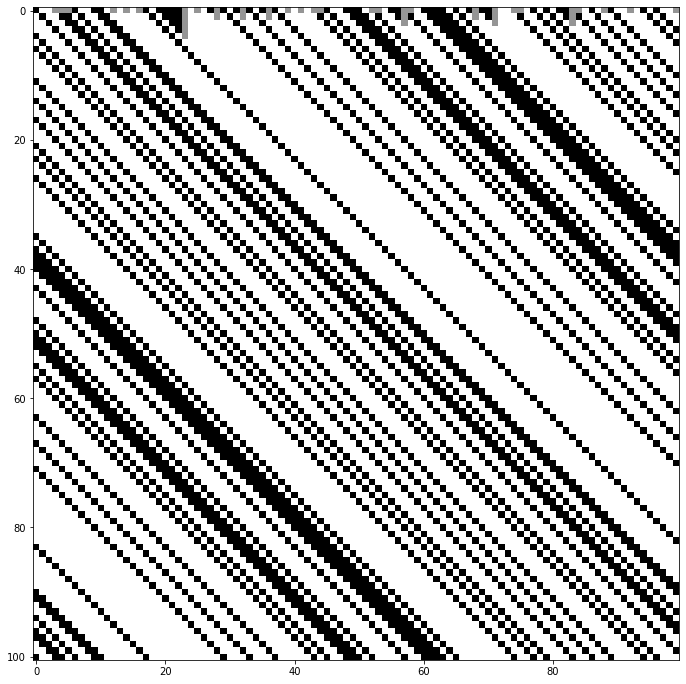

In [103]:
#### Spaghetti code version"

rule_number = 185
length = 100
time = 100 

# make the initial condition
initial_condition = []
for i in range(length):
    initial_condition.append(random.randint(0,2))

# create list of neighborhood tuples in lex. order
neighborhoods = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]

# convert the rule number to trinary and padd with 0s as needed
in_trinary = ''
for i in range(8, -1, -1):
    factor = int(pow(3,i))
    val = rule_number // factor
    in_trinary += str(val)
    rule_number -= factor*val


print(in_trinary)
# create the lookup table dictionary
lookup_table = {}
for i in range(9):
    key = neighborhoods[i]
    val = in_trinary[i]
    lookup_table.update({key:val})
    
# initialize spacetime field and current configuration
spacetime_field = [initial_condition]
current_configuration = initial_condition.copy()

print(spacetime_field)


for t in range(time):
    new_configuration = []
    for i in range(len(current_configuration)):
        
        neighborhood = (current_configuration[(i-1)], 
                        current_configuration[i])
        
        new_configuration.append(int(lookup_table[neighborhood]))
        
    current_configuration = new_configuration
    spacetime_field.append(new_configuration)
    
# plot the spacetime field diagram
plt.figure(figsize=(12,12))
plt.imshow(spacetime_field, cmap=plt.cm.Greys, interpolation='nearest')
plt.show()


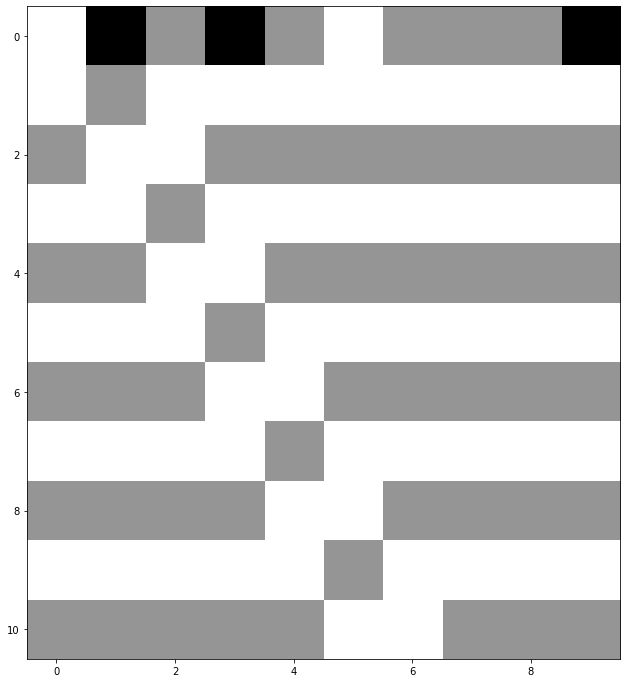

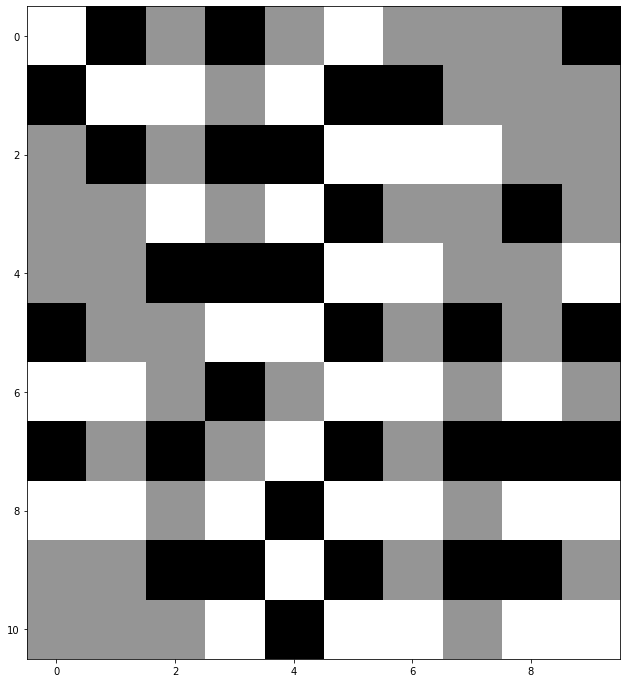

In [104]:
#Same thing, but using functions and classes instead


def random_string(length):
    '''
    Returns a random string of a given length, where each character is as 0, 1, or 2. 
    
    Parameters
    ----------
    length: int
        Posivite integer that specifies the desired length of the string.
        
    Returns
    -------
    out: list
        The random  string given as a list, with int elements.
    '''
    if not isinstance(length, int) or length < 0:
        raise ValueError("input length must be a positive ingeter")
    return [random.randint(0,2) for _ in range(length)]


class AutomataSim:
    def __init__(self, rule_number = 0):
        '''
        Initializes a tri-state automata simulator
        Parameters
        ----------
        Rule number: int
            Integer value between 0 and 19682, inclusive
    
        Attributes
        ----------
        rule_number: int
            Integer value between 0 and 19682, inclusive. Specifies the rules under which the automata evolves
        rule_number_trinary: string
            rule_number represented in base 3
        lookup:
            A lookup table for evolving the cellular automata as specified by the rule number
        
        
        '''
        self.rule_number = rule_number
        self.rule_number_trinary = self.to_trinary(rule_number)
        self.lookup = self.lookup_table()
    
    def update_rule(self,rule_number):
        '''
        Updates a simulator to use a new rule
        
        Parameters
        ----------
        Rule number: int
            Integer value between 0 and 19682, inclusinve
        
        Returns
        -------
        Nothing. State of the object is updated
        
        '''
        self.rule_number = rule_number
        self.rule_number_trinary = self.to_trinary(rule_number)
        self.lookup = self.lookup_table(self.rule_number)

        
    def to_trinary(self, rule_number):
        '''
        Returns the value of the input in base-3

        Parameters
        ----------
        rule_number: int
            Integer value between 0 and 19682, inclusive.

        Returns
        -------
        trinary: string
            Input number in base 3, as a string
        '''
        #print(not isinstance(rule_number, int))
        #print(rule_number < 0)
        #print(rule_number > 19682)
        #if (not isinstance(rule_number, int)) or rule_number < 0 or rule_number > 19682:
        #    raise ValueError("rule_number must be an int between 0 and 19682, inclusive")

        in_trinary = ''
        tmp = rule_number
        for i in range(8, -1, -1):
            factor = int(pow(3,i))
            val = tmp // factor
            in_trinary += str(val)
            tmp -= factor*val
        return(in_trinary)
    
    def lookup_table(self):
        '''
        Returns a dictionary which maps ECA neighborhoods to output values. 
        Uses Wolfram rule number convention.

        Parameters
        ----------
        None

        Returns
        -------
        lookup_table: dict
            Lookup table dictionary that maps neighborhood tuples to their output according to the 
            ECA local evolution rule (i.e. the lookup table), as specified by the rule number. 
        '''
        neighborhoods = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]

        return dict(zip(neighborhoods, map(int,reversed(self.rule_number_trinary)))) # use map so that outputs are ints, not strings


    def spacetime_field(self, initial_condition, time_steps):
        '''
        Returns a spacetime field array using the given rule number on the 
        given initial condition for the given number of time steps.

        Parameters
        ----------
        initial_condition: list
            Trinary string used as the initial condition for the ECA. Elements of the list
            should be ints. 
        time_steps: int
            Positive integer specifying the number of time steps for evolving the ECA. 
        
        Returns:
            Spacetime field consisting of initial conditions evolved for the given number of ittimeme steps
        '''
        
        
        if time_steps < 0:
            raise ValueError("time_steps must be a non-negative integer")
        # try converting time_steps to int and raise a custom error if this can't be done
        try:
            time_steps = int(time_steps)
        except ValueError:
            raise ValueError("time_steps must be a non-negative integer")

        for i in initial_condition:
            if i not in [0,1,2]:
                raise ValueError("initial condition must be a list of 0s, 1s, and 2s")

        # initialize spacetime field and current configuration
        spacetime_field = [initial_condition]
        current_configuration = initial_condition.copy()
        length = len(current_configuration)

        # apply the lookup table to evolve the CA for the given number of time steps
        for t in range(time_steps):
            new_configuration = []
            for i in range(length):

                neighborhood = (current_configuration[(i-1)], 
                                current_configuration[i])

                new_configuration.append(self.lookup[neighborhood])

            current_configuration = new_configuration

            spacetime_field.append(new_configuration)

        return spacetime_field
    
    def spacetime_diagram(self, spacetime_field, size=12, colors=plt.cm.Greys):
        '''
        Produces a simple spacetime diagram image using matplotlib imshow with 'nearest' interpolation.

       Parameters
        ---------
        spacetime_field: array-like (2D)
            1+1 dimensional spacetime field, given as a 2D array or list of lists. Time should be dimension 0;
            so that spacetime_field[t] is the spatial configuration at time t. 

        size: int, optional (default=12)
            Sets the size of the figure: figsize=(size,size)
        colors: matplotlib colormap, optional (default=plt.cm.Greys)
            See https://matplotlib.org/tutorials/colors/colormaps.html for colormap choices.
            A colormap 'cmap' is called as: colors=plt.cm.cmap
        '''
        plt.figure(figsize=(size,size))
        plt.imshow(spacetime_field, cmap=colors, interpolation='nearest')
        plt.show()
    
    def simulate(self, initial_conditions, time_steps, figsize=12):
        '''
        Run the cellular automata for a given number of time steps starting from some initial conditions
        
        Parameters
        ----------
        initial_conditions: list
            Trinary string used as the initial condition for the ECA. Elements of the list
            should be ints. 
        time_steps: int
            Positive integer indicating number of time steps
        
        figsize: int
            size of the resultant figure

        
        '''
        field = self.spacetime_field(initial_conditions, time_steps)
        self.spacetime_diagram(field, figsize)

    

initial = random_string(10)
sim = AutomataSim(10)
sim.simulate(initial, 10)
sim.update_rule(1843)
sim.simulate(initial, 10)
